In [2]:
from picachain.chains.image.search import ImageSearchChain
from picachain.datastore import ChromaStore
from picachain.embedding import ClipEmbedding
from picachain.retriever import ImageRetriever 

from PIL import Image 
import matplotlib.pyplot as plt 
import os 

## Prepare dataset

### Images for search

In [3]:
images = [
    Image.open(os.path.join("/home/home/dev/personal_projects/pikachain/data", image))
    for image in os.listdir("/home/home/dev/personal_projects/pikachain/data")
]

print(f"Number of images: {len(images)}")


Number of images: 9


### Query image

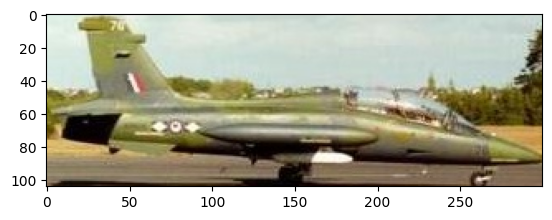

In [5]:
img = Image.open("/home/home/dev/personal_projects/pikachain/data/airplane_0000.jpg")
plt.imshow(img)

In [6]:
embedding = ClipEmbedding()
datastore = ChromaStore("test-collection")
retriever = ImageRetriever(datastore, embedding, images)
print("files added")

img_chain = ImageSearchChain.from_image(retriever, embedding, img)
result = img_chain.similar_images(top_k=3)

files added


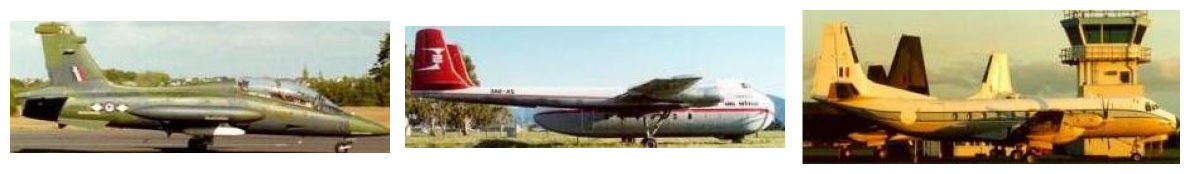

In [8]:
import matplotlib.pyplot as plt

num_images = len(result)
fig, axes = plt.subplots(1, num_images, figsize=(12, 4))

for i, (img, score) in enumerate(result):
    axes[i].imshow(img)
    axes[i].axis('off')
plt.tight_layout()
plt.show()